In [49]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calmap
import geopandas as gpd
import contextily as ctx

In [50]:
noise = pd.read_csv("datasets_pf_taxis/dataset_incidentes_ruido_2024.csv")
# Filter noise Dataset with Complaint Type = Noise - Street/Sidewalk
noise = noise.loc[noise["Complaint Type"] == "Noise - Street/Sidewalk"]
noise.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
2,59892651,01/01/2024 12:00:48 AM,01/01/2024 12:48:34 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11377.0,41-52 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.743761,-73.893186,"(40.74376141146886, -73.8931860929054)"
3,59889054,01/01/2024 12:00:51 AM,01/01/2024 12:29:32 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11416.0,85-04 95 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.684738,-73.855753,"(40.68473836098068, -73.85575323670186)"
4,59892073,01/01/2024 12:01:01 AM,01/01/2024 01:32:22 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11434.0,144-25 153 LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.666103,-73.784955,"(40.66610329232783, -73.78495540739017)"
7,59888142,01/01/2024 12:03:11 AM,01/01/2024 12:56:48 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11694.0,181 BEACH 118 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.578695,-73.838627,"(40.578695255179575, -73.8386271070049)"
16,59891733,01/01/2024 12:06:53 AM,01/01/2024 12:24:20 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11206.0,MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Eliminar filas con datos nulos en las columnas latitude y longitude
noise = noise.dropna(subset=["Latitude", "Longitude"])
noise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27634 entries, 2 to 198450
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      27634 non-null  int64  
 1   Created Date                    27634 non-null  object 
 2   Closed Date                     27601 non-null  object 
 3   Agency                          27634 non-null  object 
 4   Agency Name                     27634 non-null  object 
 5   Complaint Type                  27634 non-null  object 
 6   Descriptor                      27634 non-null  object 
 7   Location Type                   27634 non-null  object 
 8   Incident Zip                    27628 non-null  float64
 9   Incident Address                27634 non-null  object 
 10  Street Name                     27634 non-null  object 
 11  Cross Street 1                  27607 non-null  object 
 12  Cross Street 2                  2757

In [52]:
# Resumen estadístico de las columnas categóricas
print(noise.describe(include=['object']))

                  Created Date             Closed Date Agency  \
count                    27634                   27601  27634   
unique                   27541                   27380      1   
top     04/16/2024 09:04:24 PM  04/28/2024 09:31:31 PM   NYPD   
freq                         3                       3  27634   

                            Agency Name           Complaint Type  \
count                             27634                    27634   
unique                                1                        1   
top     New York City Police Department  Noise - Street/Sidewalk   
freq                              27634                    27634   

              Descriptor    Location Type Incident Address Street Name  \
count              27634            27634            27634       27634   
unique                 2                1            11609        2546   
top     Loud Music/Party  Street/Sidewalk    2400 7 AVENUE    7 AVENUE   
freq               18904            2

/tmp/ipykernel_5552/3830891069.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  noise['Created Date'] = pd.to_datetime(noise['Created Date'])


<Axes: >

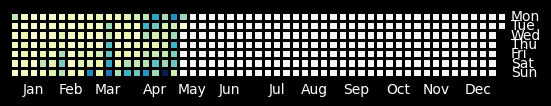

In [53]:
# Convert 'Created Date' to datetime
noise['Created Date'] = pd.to_datetime(noise['Created Date'])
# Group data by date and count complaints
daily_complaints = noise.groupby(pd.Grouper(key="Created Date", freq="D")).size()
calmap.yearplot(daily_complaints, year=2024, cmap='YlGnBu')

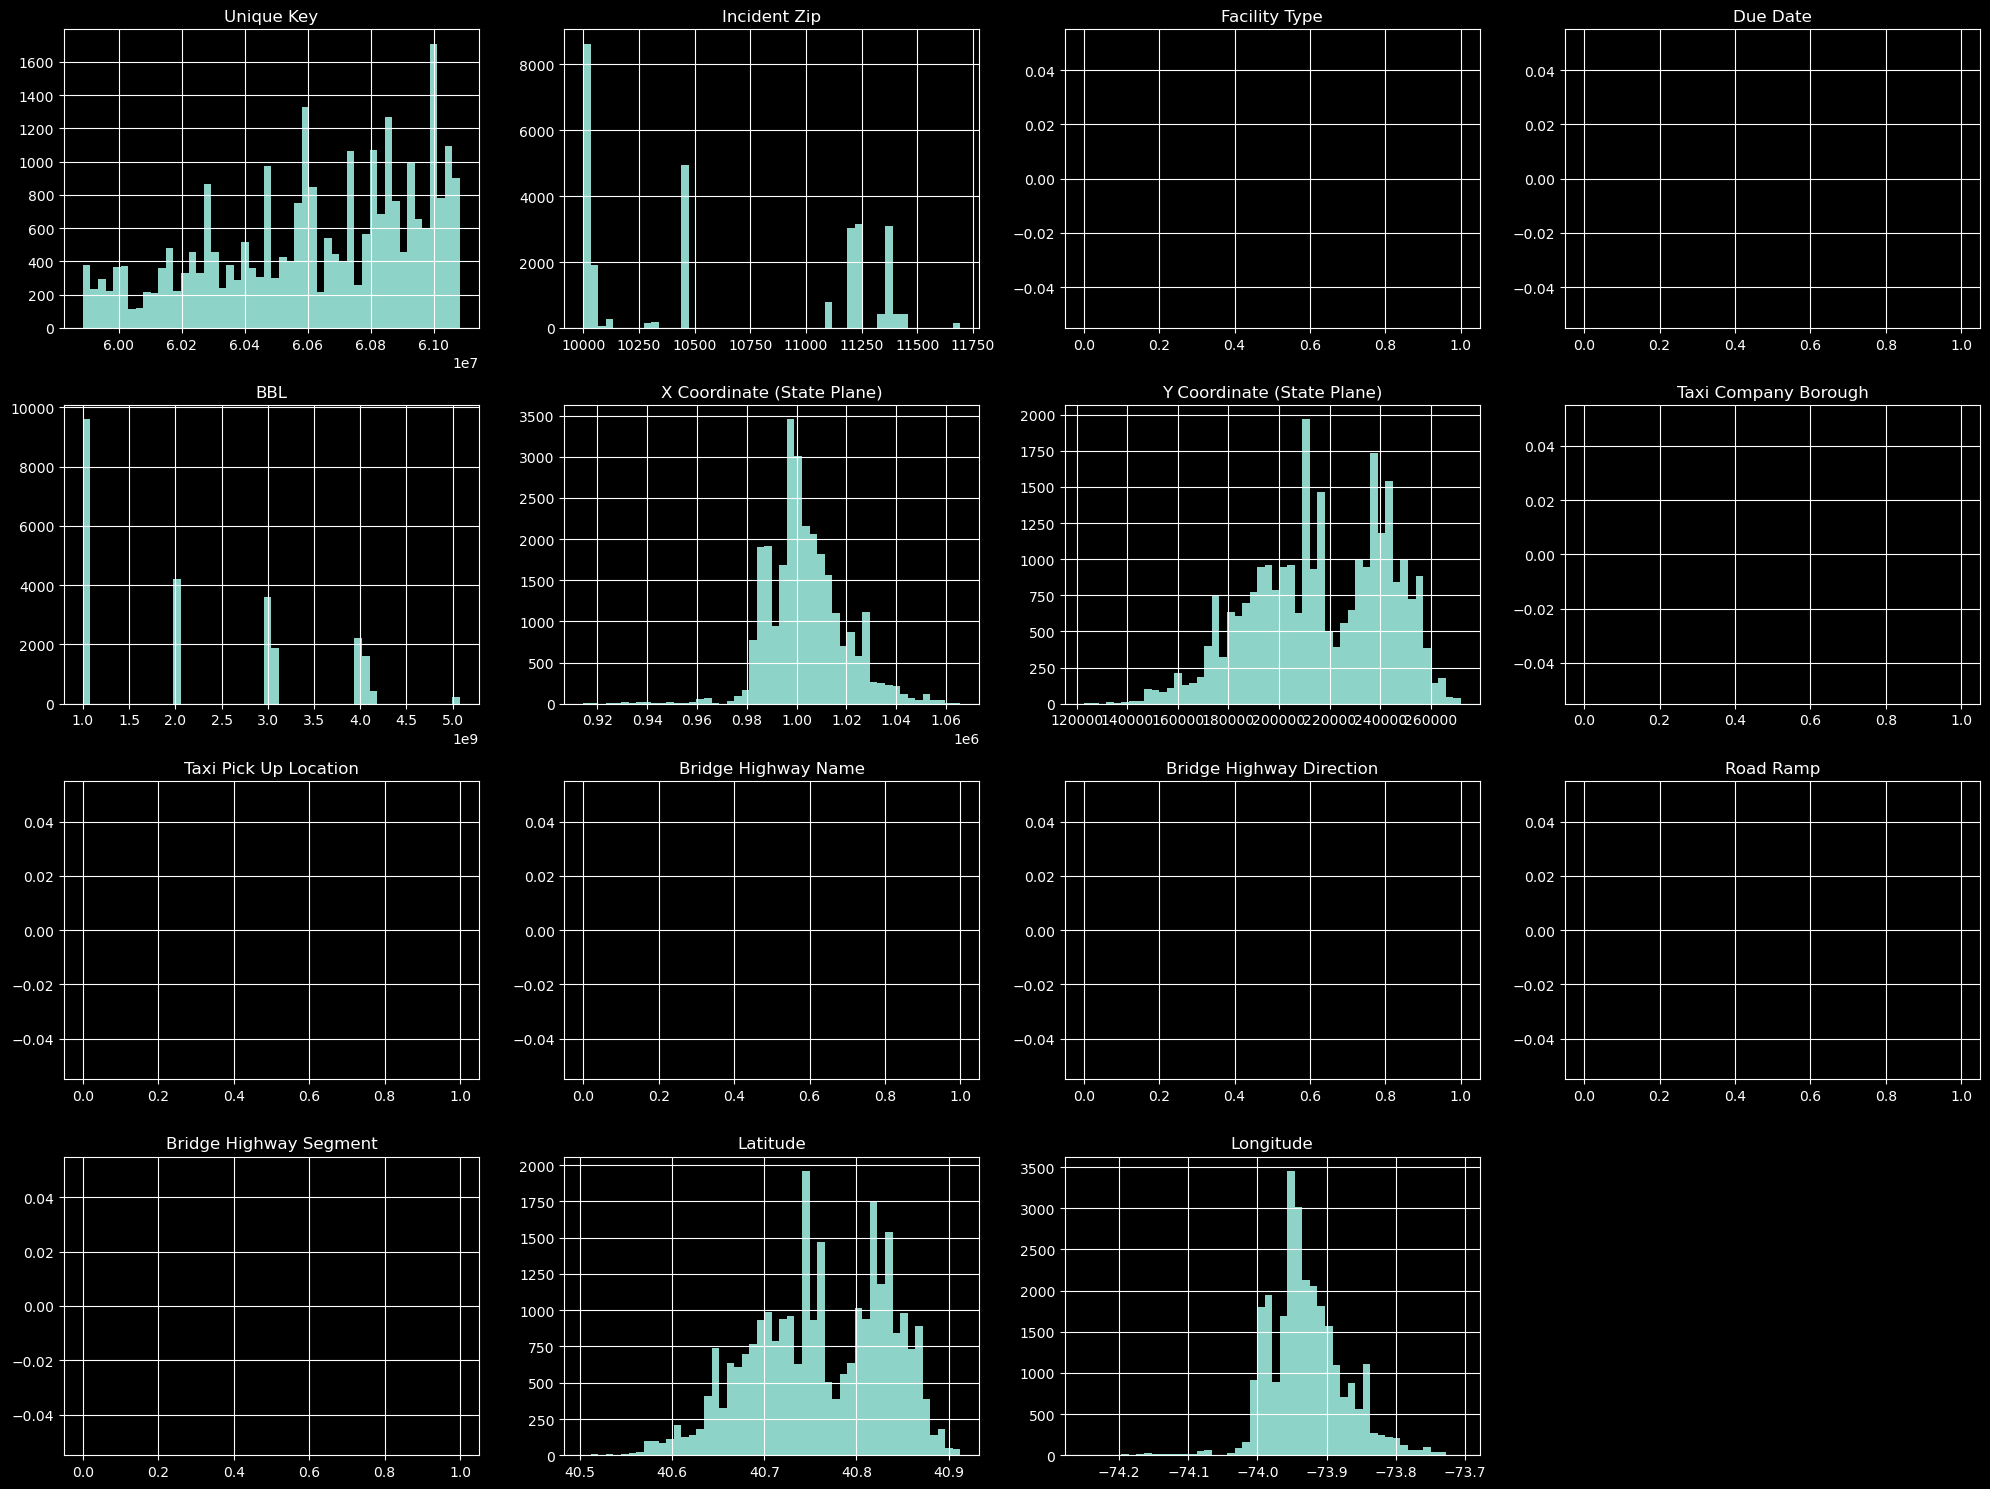

In [54]:
# Histogramas para las columnas numéricas
noise.select_dtypes(include=np.number).hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [59]:

noise['Latitude'] = pd.to_numeric(noise['Latitude'])
# Repeat for 'Longitude' if necessary
noise['Longitude'] = pd.to_numeric(noise['Longitude'])

gdf = gpd.GeoDataFrame(
    noise, geometry=gpd.points_from_xy(noise.Longitude, noise.Latitude)
)

# Ensure 'Borough' column exists and contains valid borough names

In [60]:
boroughs = gdf["Borough"].unique()
borough_data = {borough: gdf[gdf["Borough"] == borough] for borough in boroughs}

QUEENS


/workspaces/PF_SOYHENRY_RR/.conda/lib/python3.12/site-packages/contextily/tile.py:623: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

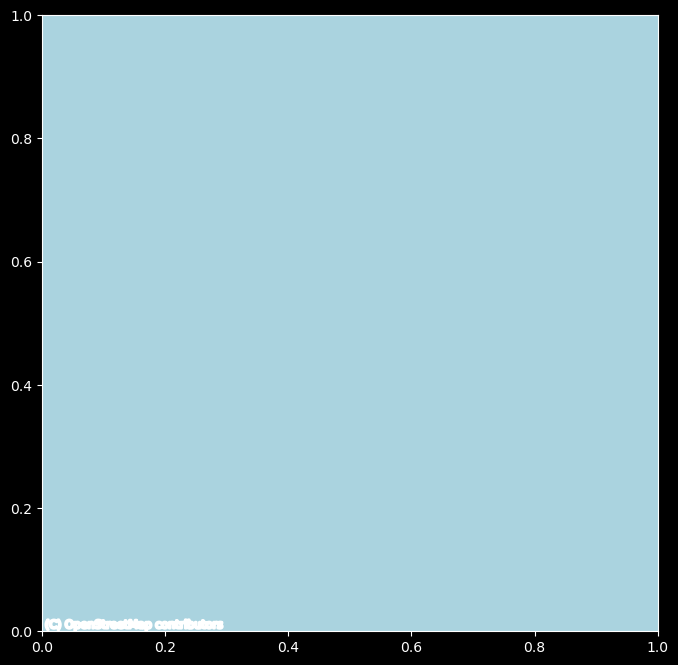

In [63]:
for borough, data in borough_data.items():
    print(borough)
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust size as needed
    # Add basemap using contextily (optional but recommended)
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
     # Create heatmap using data.plot(kind="kde")
    data.plot(kind="kde", ax=ax, cmap="Reds", alpha=0.7)

    ax.set_title(borough, fontsize=16)
    ax.axis("off")  # Remove axes

    plt.show()
    